In [15]:

import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfa



In [7]:
!pip install scikit_posthocs
import scikit_posthocs as sp


     |████████████████████████████████| 51kB 4.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37886 sha256=b67a96df83af6bb348fa2ae4f23b7621cbef9447d447ad7c2f4f1ed72d02132b
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


# **Part 1:Year 2017**

In [19]:
df_2017 = pd.read_excel("2017_dataset-.xlsx")
df_2017.head()

WOMEN  WHITE  BLACK_or_AFRICAN_AMERICAN  ...  HISPANIC  YEAR   Therapeutic_Areas
0   0.54   0.83                       0.00  ...      0.06  2017            ONCOLOGY
1   0.44   0.92                       0.06  ...      0.00  2017           NEUROLOGY
2   0.26   0.92                       0.00  ...      0.06  2017            ONCOLOGY
3   0.37   0.86                       0.05  ...      0.28  2017  INFECTIOUS DISEASE
4   0.63   0.96                       0.00  ...      0.04  2017           NEUROLOGY

[5 rows x 7 columns]

# WOMEN 2017

In [ ]:
df_1 = df_2017[['Therapeutic_Areas','WOMEN']]

df_1.head()

Therapeutic_Areas  WOMEN
0            ONCOLOGY   0.54
1           NEUROLOGY   0.44
2            ONCOLOGY   0.26
3  INFECTIOUS DISEASE   0.37
4           NEUROLOGY   0.63

In [ ]:
#NEUROLOGY
NEUROLOGY_1  = df_1[df_1['Therapeutic_Areas'] == 'NEUROLOGY']['WOMEN'].to_list()
#ONCOLOGY
ONCOLOGY_1= df_1[df_1['Therapeutic_Areas'] == 'ONCOLOGY']['WOMEN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_1,ONCOLOGY_1):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_1), len(ONCOLOGY_1)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_1, ddof=1), np.var(ONCOLOGY_1, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_1, ONCOLOGY_1):
    u1, u2 = np.mean(NEUROLOGY_1), np.mean(ONCOLOGY_1)
    s_pooled = pooled_standard_deviation(NEUROLOGY_1, ONCOLOGY_1)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_1, shade=True)
sns.kdeplot(ONCOLOGY_1, shade=True)
plt.title("Distributions of ONCOLOGY_1 and ONCOLOGY_1")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_1, ONCOLOGY_1, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.26345086684454555 T-Statistic:-1.1700611679701367


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_1,ONCOLOGY_1)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.46834896356339145
Sample Size: 72.537


In [3]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.46])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WOMEN

In [ ]:
lm_1 = sfa.ols('WOMEN ~ C(Therapeutic_Areas)', data=df_1).fit()
print(lm_1.summary())
anova_table_1 = sm.stats.anova_lm(lm_1)
print(anova_table_1)

                            OLS Regression Results                            
Dep. Variable:                  WOMEN   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     1.593
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.186
Time:                        15:58:10   Log-Likelihood:                 3.2648
No. Observations:                  35   AIC:                             7.470
Df Residuals:                      28   BIC:                             18.36
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# WHITE 2017

In [ ]:
df_2 = df_2017[['Therapeutic_Areas','WHITE']]

df_2.head()

Therapeutic_Areas  WHITE
0            ONCOLOGY   0.83
1           NEUROLOGY   0.92
2            ONCOLOGY   0.92
3  INFECTIOUS DISEASE   0.86
4           NEUROLOGY   0.96

In [ ]:
#NEUROLOGY
NEUROLOGY_2  = df_2[df_2['Therapeutic_Areas'] == 'NEUROLOGY']['WHITE'].to_list()
#ONCOLOGY
ONCOLOGY_2= df_2[df_2['Therapeutic_Areas'] == 'ONCOLOGY']['WHITE'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation_2(NEUROLOGY_2,ONCOLOGY_2):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_2), len(ONCOLOGY_2)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_2, ddof=2), np.var(ONCOLOGY_2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_2, ONCOLOGY_2):
    u1, u2 = np.mean(NEUROLOGY_2), np.mean(ONCOLOGY_2)
    s_pooled = pooled_standard_deviation(NEUROLOGY_2, ONCOLOGY_2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_2, shade=True)
sns.kdeplot(ONCOLOGY_2, shade=True)
plt.title("Distributions of ONCOLOGY_2 and ONCOLOGY_2")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_2, ONCOLOGY_2, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.8108681679002174 T-Statistic:-0.25944914835079214


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_2,ONCOLOGY_2)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size_2)

Effect size is -0.23487170493707774
Sample Size: 285.524


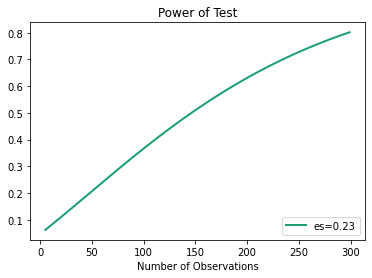

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.23])
sample_sizes = array(range(5, 300))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WHITE

In [ ]:
lm_2 = sfa.ols('WHITE ~ C(Therapeutic_Areas)', data=df_2).fit()
print(lm_2.summary())
anova_table_2 = sm.stats.anova_lm(lm_2)
print(anova_table_2)

                            OLS Regression Results                            
Dep. Variable:                  WHITE   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.159
Method:                 Least Squares   F-statistic:                    0.2241
Date:                Thu, 08 Apr 2021   Prob (F-statistic):              0.966
Time:                        08:57:58   Log-Likelihood:                 10.224
No. Observations:                  35   AIC:                            -6.449
Df Residuals:                      28   BIC:                             4.439
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# BLACK_or_AFRICAN_AMERICAN 2017

In [ ]:
df_3 = df_2017[['Therapeutic_Areas','BLACK_or_AFRICAN_AMERICAN']]

df_3.head()

Therapeutic_Areas  BLACK_or_AFRICAN_AMERICAN
0            ONCOLOGY                       0.00
1           NEUROLOGY                       0.06
2            ONCOLOGY                       0.00
3  INFECTIOUS DISEASE                       0.05
4           NEUROLOGY                       0.00

In [ ]:
#NEUROLOGY
NEUROLOGY_3  = df_3[df_3['Therapeutic_Areas'] == 'NEUROLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()
#ONCOLOGY
ONCOLOGY_3= df_3[df_3['Therapeutic_Areas'] == 'ONCOLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_3,ONCOLOGY_3):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_3), len(ONCOLOGY_3)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_3, ddof=1), np.var(ONCOLOGY_3, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_3, ONCOLOGY_3):
    u1, u2 = np.mean(NEUROLOGY_3), np.mean(ONCOLOGY_3)
    s_pooled = pooled_standard_deviation(NEUROLOGY_3, ONCOLOGY_3)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

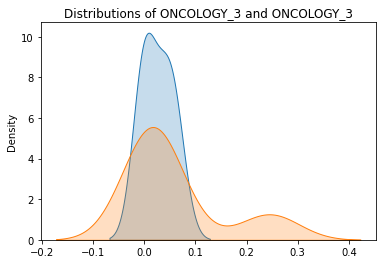

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_3, shade=True)
sns.kdeplot(ONCOLOGY_3, shade=True)
plt.title("Distributions of ONCOLOGY_3 and ONCOLOGY_3")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_3, ONCOLOGY_3, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.3159235153157454 T-Statistic:-1.0430913325070466


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_3,ONCOLOGY_3)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.400437340192746
Sample Size: 98.866


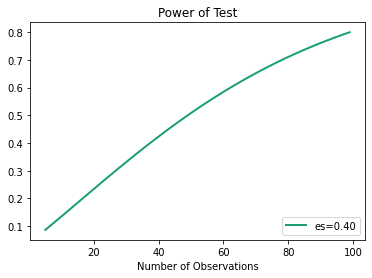

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.40])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for BLACK_or_AFRICAN_AMERICAN

In [ ]:
lm_3 = sfa.ols('BLACK_or_AFRICAN_AMERICAN ~ C(Therapeutic_Areas)', data=df_3).fit()
print(lm_3.summary())
anova_table_3 = sm.stats.anova_lm(lm_3)
print(anova_table_3)

                                OLS Regression Results                               
Dep. Variable:     BLACK_or_AFRICAN_AMERICAN   R-squared:                       0.158
Model:                                   OLS   Adj. R-squared:                 -0.022
Method:                        Least Squares   F-statistic:                    0.8769
Date:                       Thu, 08 Apr 2021   Prob (F-statistic):              0.524
Time:                               08:58:31   Log-Likelihood:                 29.196
No. Observations:                         35   AIC:                            -44.39
Df Residuals:                             28   BIC:                            -33.50
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# ASIAN 2017

In [ ]:
df_4 = df_2017[['Therapeutic_Areas','ASIAN']]

df_4.head()

Therapeutic_Areas  ASIAN
0            ONCOLOGY   0.09
1           NEUROLOGY   0.00
2            ONCOLOGY   0.03
3  INFECTIOUS DISEASE   0.00
4           NEUROLOGY   0.04

In [ ]:
#NEUROLOGY
NEUROLOGY_4 = df_4[df_4['Therapeutic_Areas'] == 'NEUROLOGY']['ASIAN'].to_list()
#ONCOLOGY
ONCOLOGY_4= df_4[df_4['Therapeutic_Areas'] == 'ONCOLOGY']['ASIAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_4,ONCOLOGY_4):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_4), len(ONCOLOGY_4)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_4, ddof=1), np.var(ONCOLOGY_4, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_4, ONCOLOGY_4):
    u1, u2 = np.mean(NEUROLOGY_4), np.mean(ONCOLOGY_4)
    s_pooled = pooled_standard_deviation(NEUROLOGY_4, ONCOLOGY_4)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

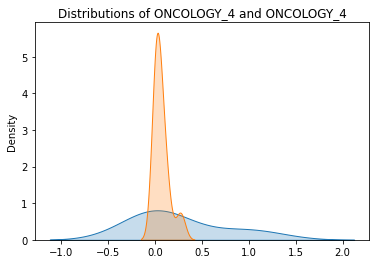

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_4, shade=True)
sns.kdeplot(ONCOLOGY_4, shade=True)
plt.title("Distributions of ONCOLOGY_4 and ONCOLOGY_4")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_4, ONCOLOGY_4, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.4816837863978635 T-Statistic:0.7989909088995566


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_4,ONCOLOGY_4)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.8008189024556153
Sample Size: 25.475


In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.8])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for ASIAN

In [ ]:
lm_4 = sfa.ols('ASIAN ~ C(Therapeutic_Areas)', data=df_4).fit()
print(lm_4.summary())
anova_table_4 = sm.stats.anova_lm(lm_4)
print(anova_table_4)

                            OLS Regression Results                            
Dep. Variable:                  ASIAN   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.012
Date:                Thu, 08 Apr 2021   Prob (F-statistic):              0.437
Time:                        08:58:43   Log-Likelihood:                 15.056
No. Observations:                  35   AIC:                            -16.11
Df Residuals:                      28   BIC:                            -5.224
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# HISPANIC 2017

In [20]:
df_5 = df_2017[['Therapeutic_Areas','HISPANIC']]

df_5.head()

Therapeutic_Areas  HISPANIC
0            ONCOLOGY      0.06
1           NEUROLOGY      0.00
2            ONCOLOGY      0.06
3  INFECTIOUS DISEASE      0.28
4           NEUROLOGY      0.04

In [ ]:
#NEUROLOGY
NEUROLOGY_5  = df_5[df_5['Therapeutic_Areas'] == 'NEUROLOGY']['HISPANIC'].to_list()
#ONCOLOGY
ONCOLOGY_5= df_5[df_5['Therapeutic_Areas'] == 'ONCOLOGY']['HISPANIC'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_5,ONCOLOGY_5):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_5), len(ONCOLOGY_5)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_5, ddof=1), np.var(ONCOLOGY_5, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_5, ONCOLOGY_5):
    u1, u2 = np.mean(NEUROLOGY_5), np.mean(ONCOLOGY_5)
    s_pooled = pooled_standard_deviation(NEUROLOGY_5, ONCOLOGY_5)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

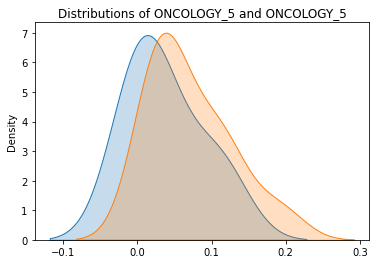

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_5, shade=True)
sns.kdeplot(ONCOLOGY_5, shade=True)
plt.title("Distributions of ONCOLOGY_5 and ONCOLOGY_5")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_5, ONCOLOGY_5, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.32190080717983005 T-Statistic:-1.0849117202330123


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_5,ONCOLOGY_5)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.6149836754569719
Sample Size: 42.488


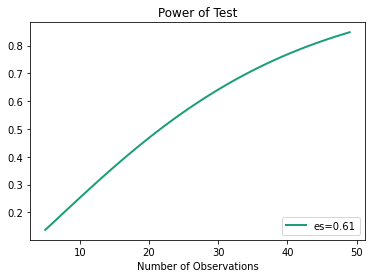

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.61])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for HISPANIC

In [21]:
lm_5 = sfa.ols('HISPANIC ~ C(Therapeutic_Areas)', data=df_5).fit()
print(lm_5.summary())
anova_table_5 = sm.stats.anova_lm(lm_5)
print(anova_table_5)

                            OLS Regression Results                            
Dep. Variable:               HISPANIC   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3.316
Date:                Sat, 10 Apr 2021   Prob (F-statistic):             0.0136
Time:                        09:09:56   Log-Likelihood:                 34.375
No. Observations:                  35   AIC:                            -54.75
Df Residuals:                      28   BIC:                            -43.86
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

The results tell us that there is a significant difference between groups means (p = 0.013579), but does not tell us the exact group pairs which are different in means. To obtain pairwise group differences, we will carry out a posteriori (post hoc) analysis using scikits-posthocs package.

Conduct a Post Hoc test in ANOVA

Since the p-value is 0.013579 (P<0.05),so we conclude that the racial group of Hispanic in clinical trials differs significantly by Therapeutic Areas for the year 2017. 

In [22]:
sp.posthoc_ttest(df_5, val_col='HISPANIC', group_col='Therapeutic_Areas', p_adjust="holm")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ONCOLOGY  ...  ENDOCRINOLOGY & METABOLISM
ONCOLOGY                    1.000000  ...                    0.252823
NEUROLOGY                   1.000000  ...                    1.000000
INFECTIOUS DISEASE          1.000000  ...                    1.000000
DERMATOLOGY                 1.000000  ...                    1.000000
IMMUNOLOGY                  0.022421  ...                    1.000000
HEMATOLOGY                       NaN  ...                         NaN
ENDOCRINOLOGY & METABOLISM  0.252823  ...                    1.000000

[7 rows x 7 columns]

# **Part 2: Year 2018**


In [ ]:
df_2018 = pd.read_excel("2018_dataset-.xlsx")
df_2018.head()

WOMEN  WHITE  ...  UNITED_STATES  Therapeutic_Areas
0   0.38   0.70  ...           0.62           ONCOLOGY
1   0.41   0.91  ...           0.09           ONCOLOGY
2   0.23   0.90  ...           1.00           ONCOLOGY
3   0.00   0.66  ...           0.28           ONCOLOGY
4   0.15   0.96  ...           0.62           ONCOLOGY

[5 rows x 7 columns]

# WOMEN 2018

In [ ]:
#NEUROLOGY
NEUROLOGY_11 = df_2018[df_2018['Therapeutic_Areas'] == 'NEUROLOGY']['WOMEN'].to_list()
#ONCOLOGY
ONCOLOGY_11= df_2018[df_2018['Therapeutic_Areas'] == 'ONCOLOGY']['WOMEN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_11,ONCOLOGY_11):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_11), len(ONCOLOGY_11)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_11, ddof=1), np.var(ONCOLOGY_11, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_11, ONCOLOGY_11):
    u1, u2 = np.mean(NEUROLOGY_11), np.mean(ONCOLOGY_11)
    s_pooled = pooled_standard_deviation(NEUROLOGY_11, ONCOLOGY_11)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

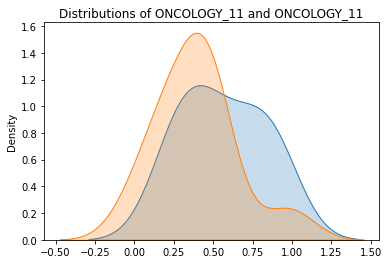

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_11, shade=True)
sns.kdeplot(ONCOLOGY_11, shade=True)
plt.title("Distributions of ONCOLOGY_11 and ONCOLOGY_11")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_11, ONCOLOGY_11, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.22701041544918377 T-Statistic:1.285836460469221


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_11,ONCOLOGY_11)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.6576841137918905
Sample Size: 37.276


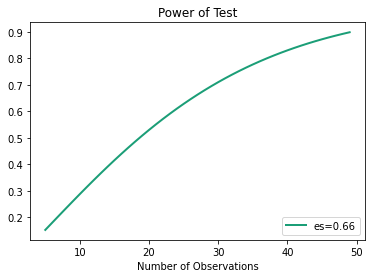

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.66])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WOMEN

In [ ]:
lm_11 = sfa.ols('WOMEN ~ C(Therapeutic_Areas)', data=df_2018).fit()
print(lm_11.summary())
anova_table_11 = sm.stats.anova_lm(lm_11)
print(anova_table_11)

                            OLS Regression Results                            
Dep. Variable:                  WOMEN   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1.869
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.107
Time:                        16:18:13   Log-Likelihood:                 7.2058
No. Observations:                  41   AIC:                             1.588
Df Residuals:                      33   BIC:                             15.30
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# WHITE 2018

In [ ]:
#NEUROLOGY
NEUROLOGY_21 = df_2018[df_2018['Therapeutic_Areas'] == 'NEUROLOGY']['WHITE'].to_list()
#ONCOLOGY
ONCOLOGY_21= df_2018[df_2018['Therapeutic_Areas'] == 'ONCOLOGY']['WHITE'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_21,ONCOLOGY_21):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_21), len(ONCOLOGY_21)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_21, ddof=1), np.var(ONCOLOGY_21, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_21, ONCOLOGY_21):
    u1, u2 = np.mean(NEUROLOGY_21), np.mean(ONCOLOGY_21)
    s_pooled = pooled_standard_deviation(NEUROLOGY_21, ONCOLOGY_21)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_21, shade=True)
sns.kdeplot(ONCOLOGY_21, shade=True)
plt.title("Distributions of ONCOLOGY_21 and ONCOLOGY_21")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_21, ONCOLOGY_21, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.7770090066283072 T-Statistic:-0.2961547165539725


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_21,ONCOLOGY_21)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.18733341471198384
Sample Size: 448.270


In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.19])
sample_sizes = array(range(5, 500))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WHITE

In [ ]:
lm_21 = sfa.ols('WHITE ~ C(Therapeutic_Areas)', data=df_2018).fit()
print(lm_21.summary())
anova_table_21 = sm.stats.anova_lm(lm_21)
print(anova_table_21)

                            OLS Regression Results                            
Dep. Variable:                  WHITE   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.225
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.317
Time:                        16:25:22   Log-Likelihood:                 3.9157
No. Observations:                  41   AIC:                             8.169
Df Residuals:                      33   BIC:                             21.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# BLACK_or_AFRICAN_AMERICAN 2018

In [ ]:
#NEUROLOGY
NEUROLOGY_31 = df_2018[df_2018['Therapeutic_Areas'] == 'NEUROLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()
#ONCOLOGY
ONCOLOGY_31= df_2018[df_2018['Therapeutic_Areas'] == 'ONCOLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_31,ONCOLOGY_31):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_31), len(ONCOLOGY_31)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_31, ddof=1), np.var(ONCOLOGY_31, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_31, ONCOLOGY_31):
    u1, u2 = np.mean(NEUROLOGY_31), np.mean(ONCOLOGY_31)
    s_pooled = pooled_standard_deviation(NEUROLOGY_31, ONCOLOGY_31)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

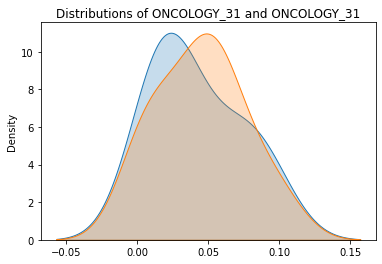

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_31, shade=True)
sns.kdeplot(ONCOLOGY_31, shade=True)
plt.title("Distributions of ONCOLOGY_31 and ONCOLOGY_31")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_31, ONCOLOGY_31, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.8606618221825886 T-Statistic:-0.18007901265939064


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_31,ONCOLOGY_31)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.09241306349602861
Sample Size: 1839.064


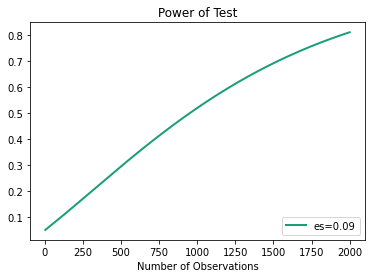

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.09])
sample_sizes = array(range(5, 2000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for BLACK_or_AFRICAN_AMERICAN

In [ ]:
lm_31 = sfa.ols('BLACK_or_AFRICAN_AMERICAN ~ C(Therapeutic_Areas)', data=df_2018).fit()
print(lm_31.summary())
anova_table_31 = sm.stats.anova_lm(lm_31)
print(anova_table_31)

                                OLS Regression Results                               
Dep. Variable:     BLACK_or_AFRICAN_AMERICAN   R-squared:                       0.270
Model:                                   OLS   Adj. R-squared:                  0.115
Method:                        Least Squares   F-statistic:                     1.746
Date:                       Fri, 09 Apr 2021   Prob (F-statistic):              0.132
Time:                               16:32:27   Log-Likelihood:                 22.809
No. Observations:                         41   AIC:                            -29.62
Df Residuals:                             33   BIC:                            -15.91
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# ASIAN 2018

In [ ]:
#NEUROLOGY
NEUROLOGY_41 = df_2018[df_2018['Therapeutic_Areas'] == 'NEUROLOGY']['ASIAN'].to_list()
#ONCOLOGY
ONCOLOGY_41= df_2018[df_2018['Therapeutic_Areas'] == 'ONCOLOGY']['ASIAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_41,ONCOLOGY_41):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_41), len(ONCOLOGY_41)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_41, ddof=1), np.var(ONCOLOGY_41, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_41, ONCOLOGY_41):
    u1, u2 = np.mean(NEUROLOGY_41), np.mean(ONCOLOGY_41)
    s_pooled = pooled_standard_deviation(NEUROLOGY_41, ONCOLOGY_41)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

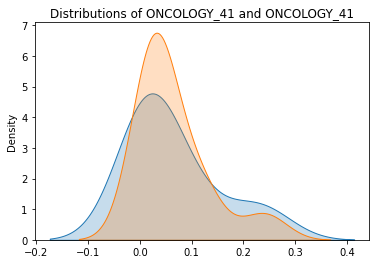

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_41, shade=True)
sns.kdeplot(ONCOLOGY_41, shade=True)
plt.title("Distributions of ONCOLOGY_41 and ONCOLOGY_41")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_41, ONCOLOGY_41, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.9745074148389785 T-Statistic:0.03291460848861014


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_41,ONCOLOGY_41)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.0180087471719559
Sample Size: 48403.663


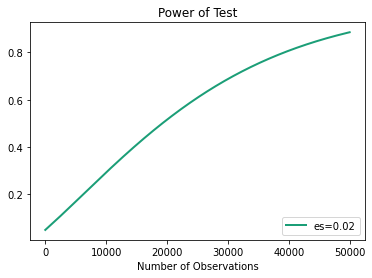

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.02])
sample_sizes = array(range(5, 50000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for ASIAN

In [ ]:
lm_41 = sfa.ols('ASIAN ~ C(Therapeutic_Areas)', data=df_2018).fit()
print(lm_41.summary())
anova_table_41 = sm.stats.anova_lm(lm_41)
print(anova_table_41)

                            OLS Regression Results                            
Dep. Variable:                  ASIAN   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.207
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.326
Time:                        16:35:22   Log-Likelihood:                 27.391
No. Observations:                  41   AIC:                            -38.78
Df Residuals:                      33   BIC:                            -25.07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# HISPANIC 2018

In [ ]:
#NEUROLOGY
NEUROLOGY_51 = df_2018[df_2018['Therapeutic_Areas'] == 'NEUROLOGY']['HISPANIC'].to_list()
#ONCOLOGY
ONCOLOGY_51= df_2018[df_2018['Therapeutic_Areas'] == 'ONCOLOGY']['HISPANIC'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_51,ONCOLOGY_51):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_51), len(ONCOLOGY_51)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_51, ddof=1), np.var(ONCOLOGY_51, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_51, ONCOLOGY_51):
    u1, u2 = np.mean(NEUROLOGY_51), np.mean(ONCOLOGY_51)
    s_pooled = pooled_standard_deviation(NEUROLOGY_51, ONCOLOGY_51)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

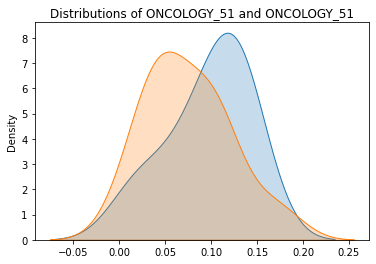

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_51, shade=True)
sns.kdeplot(ONCOLOGY_51, shade=True)
plt.title("Distributions of ONCOLOGY_51 and ONCOLOGY_51")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_51, ONCOLOGY_51, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.3584781779062427 T-Statistic:0.9598286330233405


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_51,ONCOLOGY_51)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.4834458288973688
Sample Size: 68.138


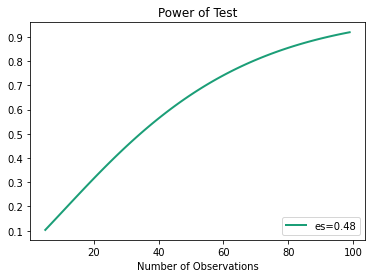

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.48])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for HISPANIC

In [ ]:
lm_51 = sfa.ols('HISPANIC ~ C(Therapeutic_Areas)', data=df_2018).fit()
print(lm_51.summary())
anova_table_51 = sm.stats.anova_lm(lm_51)
print(anova_table_51)

                            OLS Regression Results                            
Dep. Variable:               HISPANIC   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.8651
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.544
Time:                        16:37:27   Log-Likelihood:                 29.648
No. Observations:                  41   AIC:                            -43.30
Df Residuals:                      33   BIC:                            -29.59
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# **Part 3: Year 2019**

In [ ]:
df_2019 = pd.read_excel("2019_dataset-.xlsx")
df_2019.head()

WOMEN  WHITE  BLACK_or_AFRICAN_AMERICAN  ...  HISPANIC  YEAR  Therapeutic_Areas
0   0.68   0.83                       0.12  ...      0.14  2019         HEMATOLOGY
1   0.67   0.74                       0.17  ...      0.03  2019         HEMATOLOGY
2   0.89   0.78                       0.01  ...      0.09  2019         HEMATOLOGY
3   0.59   0.24                       0.67  ...      0.03  2019         HEMATOLOGY
4   0.58   0.54                       0.01  ...      0.02  2019         HEMATOLOGY

[5 rows x 7 columns]

# WOMEN 2019

In [ ]:
#NEUROLOGY
NEUROLOGY_12 = df_2019[df_2019['Therapeutic_Areas'] == 'NEUROLOGY']['WOMEN'].to_list()
#ONCOLOGY
ONCOLOGY_12= df_2019[df_2019['Therapeutic_Areas'] == 'ONCOLOGY']['WOMEN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_12,ONCOLOGY_12):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_12), len(ONCOLOGY_12)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_12, ddof=1), np.var(ONCOLOGY_12, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_12, ONCOLOGY_12):
    u1, u2 = np.mean(NEUROLOGY_12), np.mean(ONCOLOGY_12)
    s_pooled = pooled_standard_deviation(NEUROLOGY_12, ONCOLOGY_12)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

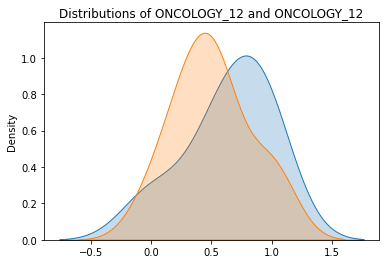

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_12, shade=True)
sns.kdeplot(ONCOLOGY_12, shade=True)
plt.title("Distributions of ONCOLOGY_12 and ONCOLOGY_12")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_12, ONCOLOGY_12, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.4754371759174091 T-Statistic:0.7429481003518501


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_12,ONCOLOGY_12)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.3976666121341727
Sample Size: 100.235


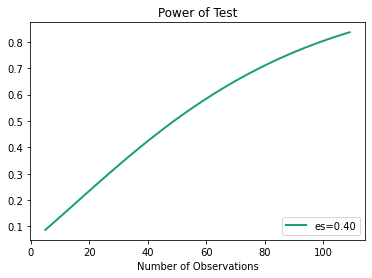

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.40])
sample_sizes = array(range(5, 110))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WOMEN

In [ ]:
lm_12 = sfa.ols('WOMEN ~ C(Therapeutic_Areas)', data=df_2019).fit()
print(lm_12.summary())
anova_table_12 = sm.stats.anova_lm(lm_12)
print(anova_table_12)

                            OLS Regression Results                            
Dep. Variable:                  WOMEN   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.7718
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.616
Time:                        17:05:40   Log-Likelihood:                -1.4422
No. Observations:                  33   AIC:                             18.88
Df Residuals:                      25   BIC:                             30.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# WHITE 2019

In [ ]:
#NEUROLOGY
NEUROLOGY_22 = df_2019[df_2019['Therapeutic_Areas'] == 'NEUROLOGY']['WHITE'].to_list()
#ONCOLOGY
ONCOLOGY_22= df_2019[df_2019['Therapeutic_Areas'] == 'ONCOLOGY']['WHITE'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_22,ONCOLOGY_22):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_22), len(ONCOLOGY_22)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_22, ddof=1), np.var(ONCOLOGY_22, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_22, ONCOLOGY_22):
    u1, u2 = np.mean(NEUROLOGY_22), np.mean(ONCOLOGY_22)
    s_pooled = pooled_standard_deviation(NEUROLOGY_22, ONCOLOGY_22)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

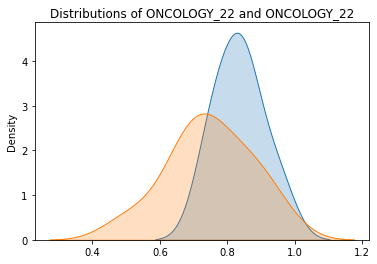

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_22, shade=True)
sns.kdeplot(ONCOLOGY_22, shade=True)
plt.title("Distributions of ONCOLOGY_22 and ONCOLOGY_22")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_22, ONCOLOGY_22, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.09725809104416905 T-Statistic:1.7772237975898904


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_22,ONCOLOGY_22)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.8053422964214398
Sample Size: 25.201


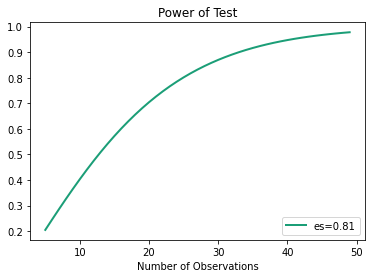

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.81])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WHITE

In [ ]:
lm_22 = sfa.ols('WHITE ~ C(Therapeutic_Areas)', data=df_2019).fit()
print(lm_22.summary())
anova_table_22 = sm.stats.anova_lm(lm_22)
print(anova_table_22)

                            OLS Regression Results                            
Dep. Variable:                  WHITE   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.368
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.262
Time:                        17:07:46   Log-Likelihood:                 17.947
No. Observations:                  33   AIC:                            -19.89
Df Residuals:                      25   BIC:                            -7.921
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# BLACK_or_AFRICAN_AMERICAN 2019

In [ ]:
#NEUROLOGY
NEUROLOGY_32 = df_2019[df_2019['Therapeutic_Areas'] == 'NEUROLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()
#ONCOLOGY
ONCOLOGY_32= df_2019[df_2019['Therapeutic_Areas'] == 'ONCOLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_32,ONCOLOGY_32):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_32), len(ONCOLOGY_32)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_32, ddof=1), np.var(ONCOLOGY_32, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_32, ONCOLOGY_32):
    u1, u2 = np.mean(NEUROLOGY_32), np.mean(ONCOLOGY_32)
    s_pooled = pooled_standard_deviation(NEUROLOGY_32, ONCOLOGY_32)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

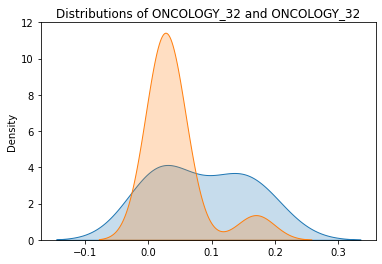

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_32, shade=True)
sns.kdeplot(ONCOLOGY_32, shade=True)
plt.title("Distributions of ONCOLOGY_32 and ONCOLOGY_32")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_32, ONCOLOGY_32, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.23883258176671443 T-Statistic:1.281000558056341


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_32,ONCOLOGY_32)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.7444362963156113
Sample Size: 29.318


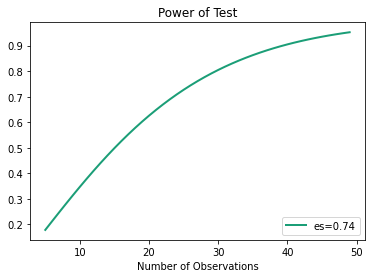

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.74])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for BLACK_or_AFRICAN_AMERICAN

In [ ]:
lm_32 = sfa.ols('BLACK_or_AFRICAN_AMERICAN ~ C(Therapeutic_Areas)', data=df_2019).fit()
print(lm_32.summary())
anova_table_32 = sm.stats.anova_lm(lm_32)
print(anova_table_32)

                                OLS Regression Results                               
Dep. Variable:     BLACK_or_AFRICAN_AMERICAN   R-squared:                       0.353
Model:                                   OLS   Adj. R-squared:                  0.172
Method:                        Least Squares   F-statistic:                     1.949
Date:                       Fri, 09 Apr 2021   Prob (F-statistic):              0.104
Time:                               17:10:42   Log-Likelihood:                 18.352
No. Observations:                         33   AIC:                            -20.70
Df Residuals:                             25   BIC:                            -8.732
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------

# ASIAN 2019

In [ ]:
#NEUROLOGY
NEUROLOGY_42 = df_2019[df_2019['Therapeutic_Areas'] == 'NEUROLOGY']['ASIAN'].to_list()
#ONCOLOGY
ONCOLOGY_42= df_2019[df_2019['Therapeutic_Areas'] == 'ONCOLOGY']['ASIAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_42,ONCOLOGY_42):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_42), len(ONCOLOGY_42)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_42, ddof=1), np.var(ONCOLOGY_42, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_42, ONCOLOGY_42):
    u1, u2 = np.mean(NEUROLOGY_42), np.mean(ONCOLOGY_42)
    s_pooled = pooled_standard_deviation(NEUROLOGY_42, ONCOLOGY_42)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

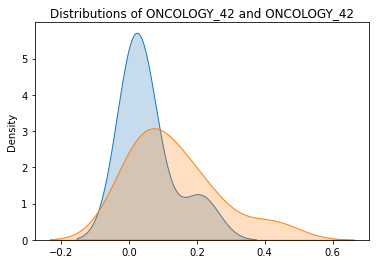

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_42, shade=True)
sns.kdeplot(ONCOLOGY_42, shade=True)
plt.title("Distributions of ONCOLOGY_42 and ONCOLOGY_42")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_42, ONCOLOGY_42, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.16436587893850463 T-Statistic:-1.4676422067850254


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_42,ONCOLOGY_42)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.6705550895443858
Sample Size: 35.898


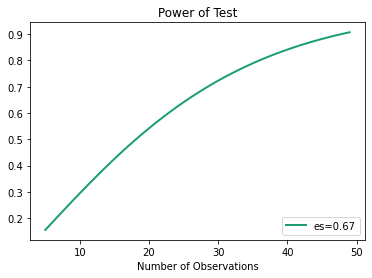

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.67])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for ASIAN

In [ ]:
lm_42 = sfa.ols('ASIAN ~ C(Therapeutic_Areas)', data=df_2019).fit()
print(lm_42.summary())
anova_table_42 = sm.stats.anova_lm(lm_42)
print(anova_table_42)

                            OLS Regression Results                            
Dep. Variable:                  ASIAN   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                 -0.121
Method:                 Least Squares   F-statistic:                    0.5070
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.820
Time:                        17:12:58   Log-Likelihood:                 31.321
No. Observations:                  33   AIC:                            -46.64
Df Residuals:                      25   BIC:                            -34.67
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# HISPANIC 2019

In [ ]:
#NEUROLOGY
NEUROLOGY_52 = df_2019[df_2019['Therapeutic_Areas'] == 'NEUROLOGY']['HISPANIC'].to_list()
#ONCOLOGY
ONCOLOGY_52= df_2019[df_2019['Therapeutic_Areas'] == 'ONCOLOGY']['HISPANIC'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_52,ONCOLOGY_52):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_52), len(ONCOLOGY_52)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_52, ddof=1), np.var(ONCOLOGY_52, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_52, ONCOLOGY_52):
    u1, u2 = np.mean(NEUROLOGY_52), np.mean(ONCOLOGY_52)
    s_pooled = pooled_standard_deviation(NEUROLOGY_52, ONCOLOGY_52)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

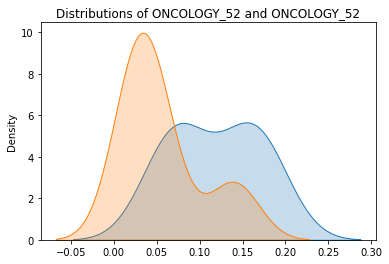

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_52, shade=True)
sns.kdeplot(ONCOLOGY_52, shade=True)
plt.title("Distributions of ONCOLOGY_52 and ONCOLOGY_52")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_52, ONCOLOGY_52, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.03486510278858459 T-Statistic:2.4493146429021344


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_52,ONCOLOGY_52)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 1.3012899255109303
Sample Size: 10.325


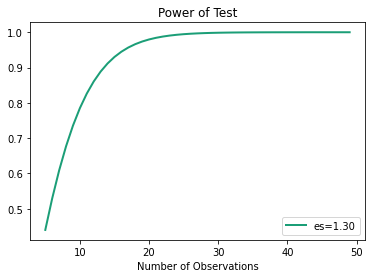

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([1.30])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for HISPANIC

In [ ]:
lm_52 = sfa.ols('HISPANIC ~ C(Therapeutic_Areas)', data=df_2019).fit()
print(lm_52.summary())
anova_table_52 = sm.stats.anova_lm(lm_52)
print(anova_table_52)

                            OLS Regression Results                            
Dep. Variable:               HISPANIC   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2.302
Date:                Fri, 09 Apr 2021   Prob (F-statistic):             0.0589
Time:                        17:17:02   Log-Likelihood:                 43.548
No. Observations:                  33   AIC:                            -71.10
Df Residuals:                      25   BIC:                            -59.12
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# **Part 4: Year 2020**

In [9]:
df_2020 = pd.read_excel("2020_dataset-.xlsx")
df_2020.head()

WOMEN  WHITE  BLACK_or_AFRICAN_AMERICAN  ...  HISPANIC  YEAR  Therapeutic_Areas
0   0.39   0.72                       0.04  ...      0.03  2020           ONCOLOGY
1   0.47   0.78                       0.16  ...      0.04  2020           ONCOLOGY
2   0.37   0.69                       0.03  ...      0.06  2020           ONCOLOGY
3   0.52   0.50                       0.00  ...      0.04  2020           ONCOLOGY
4   0.31   0.92                       0.03  ...      0.05  2020           ONCOLOGY

[5 rows x 7 columns]

# WOMEN 2020

In [ ]:
#NEUROLOGY
NEUROLOGY_13 = df_2020[df_2020['Therapeutic_Areas'] == 'NEUROLOGY']['WOMEN'].to_list()
#ONCOLOGY
ONCOLOGY_13= df_2020[df_2020['Therapeutic_Areas'] == 'ONCOLOGY']['WOMEN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_13,ONCOLOGY_13):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_13), len(ONCOLOGY_13)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_13, ddof=1), np.var(ONCOLOGY_13, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_13, ONCOLOGY_13):
    u1, u2 = np.mean(NEUROLOGY_13), np.mean(ONCOLOGY_13)
    s_pooled = pooled_standard_deviation(NEUROLOGY_13, ONCOLOGY_13)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_13, shade=True)
sns.kdeplot(ONCOLOGY_13, shade=True)
plt.title("Distributions of ONCOLOGY_13 and ONCOLOGY_13")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_13, ONCOLOGY_13, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.23015247137228817 T-Statistic:1.2474716609461538


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_13,ONCOLOGY_13)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.5102990155447289
Sample Size: 61.257


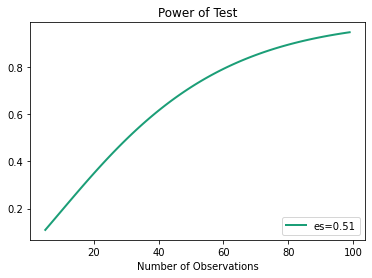

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.51])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WOMEN

In [ ]:
lm_13 = sfa.ols('WOMEN ~ C(Therapeutic_Areas)', data=df_2020).fit()
print(lm_13.summary())
anova_table_13 = sm.stats.anova_lm(lm_13)
print(anova_table_13)

                            OLS Regression Results                            
Dep. Variable:                  WOMEN   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.068
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.400
Time:                        17:22:28   Log-Likelihood:                0.32021
No. Observations:                  42   AIC:                             13.36
Df Residuals:                      35   BIC:                             25.52
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# WHITE 2020

In [ ]:
#NEUROLOGY
NEUROLOGY_23 = df_2020[df_2020['Therapeutic_Areas'] == 'NEUROLOGY']['WHITE'].to_list()
#ONCOLOGY
ONCOLOGY_23= df_2020[df_2020['Therapeutic_Areas'] == 'ONCOLOGY']['WHITE'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_23,ONCOLOGY_23):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_23), len(ONCOLOGY_23)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_23, ddof=1), np.var(ONCOLOGY_23, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_23, ONCOLOGY_23):
    u1, u2 = np.mean(NEUROLOGY_23), np.mean(ONCOLOGY_23)
    s_pooled = pooled_standard_deviation(NEUROLOGY_23, ONCOLOGY_23)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

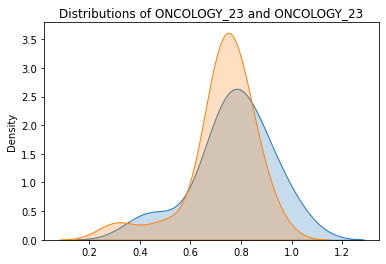

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_23, shade=True)
sns.kdeplot(ONCOLOGY_23, shade=True)
plt.title("Distributions of ONCOLOGY_23 and ONCOLOGY_23")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_23, ONCOLOGY_23, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.48838382116864143 T-Statistic:0.7110203224473658


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_23,ONCOLOGY_23)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.3027184237308367
Sample Size: 172.266


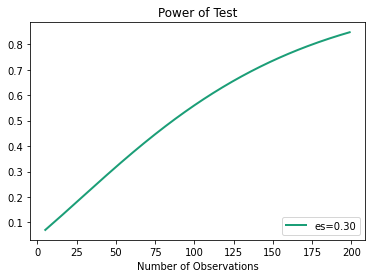

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.30])
sample_sizes = array(range(5, 200))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for WHITE

In [ ]:
lm_23 = sfa.ols('WHITE ~ C(Therapeutic_Areas)', data=df_2020).fit()
print(lm_23.summary())
anova_table_23 = sm.stats.anova_lm(lm_23)
print(anova_table_23)

                            OLS Regression Results                            
Dep. Variable:                  WHITE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     2.025
Date:                Fri, 09 Apr 2021   Prob (F-statistic):             0.0884
Time:                        17:28:04   Log-Likelihood:                 28.313
No. Observations:                  42   AIC:                            -42.63
Df Residuals:                      35   BIC:                            -30.46
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

BLACK_or_AFRICAN_AMERICAN 2020

In [ ]:
#NEUROLOGY
NEUROLOGY_33 = df_2020[df_2020['Therapeutic_Areas'] == 'NEUROLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()
#ONCOLOGY
ONCOLOGY_33= df_2020[df_2020['Therapeutic_Areas'] == 'ONCOLOGY']['BLACK_or_AFRICAN_AMERICAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_33,ONCOLOGY_33):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_33), len(ONCOLOGY_33)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_33, ddof=1), np.var(ONCOLOGY_33, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_33, ONCOLOGY_33):
    u1, u2 = np.mean(NEUROLOGY_33), np.mean(ONCOLOGY_33)
    s_pooled = pooled_standard_deviation(NEUROLOGY_33, ONCOLOGY_33)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

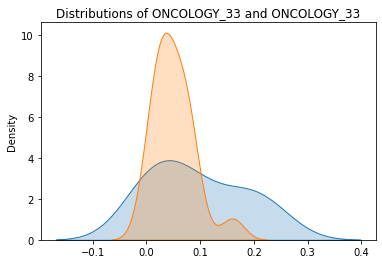

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_33, shade=True)
sns.kdeplot(ONCOLOGY_33, shade=True)
plt.title("Distributions of ONCOLOGY_33 and ONCOLOGY_33")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_33, ONCOLOGY_33, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.17982807062721853 T-Statistic:1.447053776647458


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_33,ONCOLOGY_33)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.7521722151786998
Sample Size: 28.739


In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.75])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for BLACK_or_AFRICAN_AMERICAN

In [ ]:
lm_33 = sfa.ols('BLACK_or_AFRICAN_AMERICAN ~ C(Therapeutic_Areas)', data=df_2020).fit()
print(lm_33.summary())
anova_table_33 = sm.stats.anova_lm(lm_33)
print(anova_table_33)

                                OLS Regression Results                               
Dep. Variable:     BLACK_or_AFRICAN_AMERICAN   R-squared:                       0.207
Model:                                   OLS   Adj. R-squared:                  0.071
Method:                        Least Squares   F-statistic:                     1.522
Date:                       Fri, 09 Apr 2021   Prob (F-statistic):              0.200
Time:                               17:30:26   Log-Likelihood:                 61.298
No. Observations:                         42   AIC:                            -108.6
Df Residuals:                             35   BIC:                            -96.43
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# ASIAN 2020

In [ ]:
#NEUROLOGY
NEUROLOGY_43 = df_2020[df_2020['Therapeutic_Areas'] == 'NEUROLOGY']['ASIAN'].to_list()
#ONCOLOGY
ONCOLOGY_43= df_2020[df_2020['Therapeutic_Areas'] == 'ONCOLOGY']['ASIAN'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_43,ONCOLOGY_43):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_43), len(ONCOLOGY_43)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_43, ddof=1), np.var(ONCOLOGY_43, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_43, ONCOLOGY_43):
    u1, u2 = np.mean(NEUROLOGY_43), np.mean(ONCOLOGY_43)
    s_pooled = pooled_standard_deviation(NEUROLOGY_43, ONCOLOGY_43)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

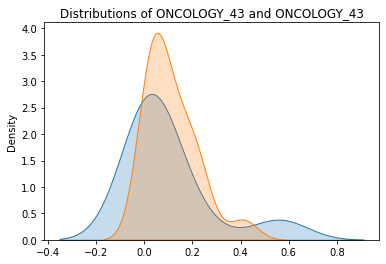

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_43, shade=True)
sns.kdeplot(ONCOLOGY_43, shade=True)
plt.title("Distributions of ONCOLOGY_43 and ONCOLOGY_43")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_43, ONCOLOGY_43, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.8488814149480841 T-Statistic:-0.19517433057522257


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_43,ONCOLOGY_43)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is -0.09482814839203209
Sample Size: 1746.631


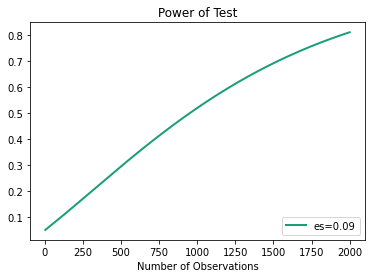

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.09])
sample_sizes = array(range(5, 2000))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for ASIAN

In [ ]:
lm_43 = sfa.ols('ASIAN ~ C(Therapeutic_Areas)', data=df_2020).fit()
print(lm_43.summary())
anova_table_43 = sm.stats.anova_lm(lm_43)
print(anova_table_43)

                            OLS Regression Results                            
Dep. Variable:                  ASIAN   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.6330
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.703
Time:                        17:32:03   Log-Likelihood:                 31.309
No. Observations:                  42   AIC:                            -48.62
Df Residuals:                      35   BIC:                            -36.45
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# HISPANIC 2020

In [ ]:
#NEUROLOGY
NEUROLOGY_53 = df_2020[df_2020['Therapeutic_Areas'] == 'NEUROLOGY']['HISPANIC'].to_list()
#ONCOLOGY
ONCOLOGY_53= df_2020[df_2020['Therapeutic_Areas'] == 'ONCOLOGY']['HISPANIC'].to_list()

Conduct analysis of the distribution

In [ ]:
import numpy as np

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(NEUROLOGY_53,ONCOLOGY_53):
    #calculate the sample size
    n1, n2 = len(NEUROLOGY_53), len(ONCOLOGY_53)
    #calculate the variances
    var1, var2 = np.var(NEUROLOGY_53, ddof=1), np.var(ONCOLOGY_53, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [ ]:
# function to calculate Cohen's d for independent samples
def Cohens_d(NEUROLOGY_53, ONCOLOGY_53):
    u1, u2 = np.mean(NEUROLOGY_53), np.mean(ONCOLOGY_53)
    s_pooled = pooled_standard_deviation(NEUROLOGY_53, ONCOLOGY_53)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

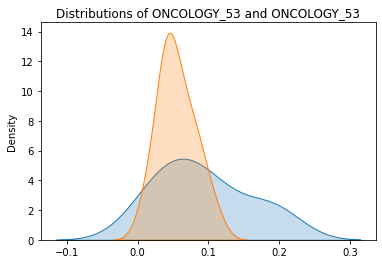

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(NEUROLOGY_53, shade=True)
sns.kdeplot(ONCOLOGY_53, shade=True)
plt.title("Distributions of ONCOLOGY_53 and ONCOLOGY_53")
plt.show()

Demonstration of a-priori Power

In [ ]:
from scipy import stats
#from statsmodels.stats.power import TTestIndPower

tStat, pValue = stats.ttest_ind(NEUROLOGY_53, ONCOLOGY_53, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.13053363597681977 T-Statistic:1.6578101078619496


In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(NEUROLOGY_53,ONCOLOGY_53)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.8753392377533266
Sample Size: 21.491


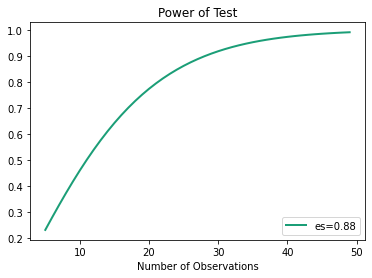

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.88])
sample_sizes = array(range(5, 50))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

ANOVA test for HISPANIC

In [13]:
lm_53 = sfa.ols('HISPANIC ~ C(Therapeutic_Areas)', data=df_2020).fit()
print(lm_53.summary())
anova_table_53 = sm.stats.anova_lm(lm_53)
print(anova_table_53)

                            OLS Regression Results                            
Dep. Variable:               HISPANIC   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 10 Apr 2021   Prob (F-statistic):            0.00688
Time:                        08:59:30   Log-Likelihood:                 18.828
No. Observations:                  42   AIC:                            -23.66
Df Residuals:                      35   BIC:                            -11.49
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

The results tell us that there is a significant difference between groups means (p = 0.006882), but does not tell us the exact group pairs which are different in means. To obtain pairwise group differences, we will carry out a posteriori (post hoc) analysis using scikits-posthocs package.

Conduct a Post Hoc test in ANOVA

Since the p-value is 0.006882 (P<0.05),so we conclude that the racial group of Hispanic in clinical trials differs significantly by Therapeutic Areas for the year 2020. 

In [16]:
sp.posthoc_ttest(df_2020, val_col='HISPANIC', group_col='Therapeutic_Areas', p_adjust="holm")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ONCOLOGY  NEUROLOGY  ...  DERMATOLOGY  CARDIOVASCULAR
ONCOLOGY                    1.000000   0.754825  ...     0.083074             NaN
NEUROLOGY                   0.754825   1.000000  ...     1.000000             NaN
INFECTIOUS DISEASE          0.001638   0.242331  ...     1.000000             NaN
ENDOCRINOLOGY & METABOLISM  0.754825   1.000000  ...     1.000000             NaN
IMMUNOLOGY                  0.754825   1.000000  ...     1.000000             NaN
DERMATOLOGY                 0.083074   1.000000  ...     1.000000             NaN
CARDIOVASCULAR                   NaN        NaN  ...          NaN             1.0

[7 rows x 7 columns]